In [1]:
!pip install tensorflow
!pip install nltk
!pip install numpy
!pip install --upgrade nltk

In [35]:
import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# see the data
print("Number of training examples:", len(x_train))
print("Number of testing examples:", len(x_test))
print(x_train[0])


# Get the word index dictionary
word_index = imdb.get_word_index()
# Calculate the number of unique words
num_unique_words = len(word_index)
print(f'Total number of unique words in the IMDb dataset: {num_unique_words}')

Number of training examples: 25000
Number of testing examples: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 

In [4]:
# Find the maximum length of a review in the training set
max_len_train = max(len(review) for review in x_train)
max_len_test = max(len(review) for review in x_test)

# Find the overall maximum length
max_len = max(max_len_train, max_len_test)

print(f'Maximum length of a review in the training set: {max_len_train}')
print(f'Maximum length of a review in the testing set: {max_len_test}')
print(f'Overall maximum length: {max_len}')

Maximum length of a review in the training set: 2494
Maximum length of a review in the testing set: 2315
Overall maximum length: 2494


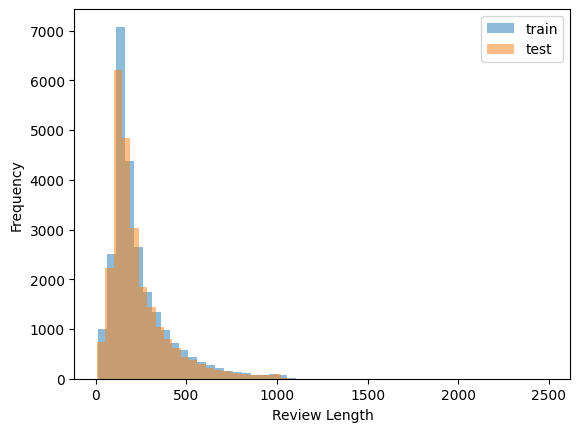

In [5]:
import matplotlib.pyplot as plt

# Get lengths of all reviews
train_lengths = [len(review) for review in x_train]
test_lengths = [len(review) for review in x_test]

# Plot the distribution of review lengths
plt.hist(train_lengths, bins=50, alpha=0.5, label='train')
plt.hist(test_lengths, bins=50, alpha=0.5, label='test')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [6]:
# i set maximun padding length is 250 because the maximum reviews lies in 250 words
max_len = 250

# Pad sequences to ensure all reviews are the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [52]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, return_sequences=True, kernel_regularizer=l2(0.01)))  # Added L2 regularization
model.add(Dropout(0.3))  # Increased dropout
model.add(LSTM(units=128, kernel_regularizer=l2(0.01)))  # Added L2 regularization # Increased dropout
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Added L2 regularization

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 250, 128)          1280000   
                                                                 
 lstm_18 (LSTM)              (None, 250, 128)          131584    
                                                                 
 dropout_7 (Dropout)         (None, 250, 128)          0         
                                                                 
 lstm_19 (LSTM)              (None, 128)               131584    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1543297 (5.89 MB)
Trainable params: 1543297 (5.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Train the model
batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 35s 100ms/step - loss: 0.8939 - accuracy: 0.7519 - val_loss: 0.5385 - val_accuracy: 0.8018
Epoch 2/15
313/313 [==============================] - 17s 54ms/step - loss: 0.3513 - accuracy: 0.8773 - val_loss: 0.3703 - val_accuracy: 0.8682
Epoch 3/15
313/313 [==============================] - 13s 40ms/step - loss: 0.2749 - accuracy: 0.9104 - val_loss: 0.3853 - val_accuracy: 0.8576
Epoch 4/15
313/313 [==============================] - 10s 33ms/step - loss: 0.2318 - accuracy: 0.9268 - val_loss: 0.4068 - val_accuracy: 0.8384
Epoch 5/15
313/313 [==============================] - 10s 32ms/step - loss: 0.2110 - accuracy: 0.9334 - val_loss: 0.4226 - val_accuracy: 0.8430
Epoch 6/15
313/313 [==============================] - 9s 30ms/step - loss: 0.1802 - accuracy: 0.9472 - val_loss: 0.4183 - val_accuracy: 0.8584
Epoch 7/15
313/313 [==============================] - 10s 31ms/step - loss: 0.1666 - accuracy: 0.9521 - val_loss: 0.4197 - val_accuracy:

In [55]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


782/782 [==============================] - 7s 9ms/step - loss: 0.5742 - accuracy: 0.8306
Test Accuracy: 0.83


In [54]:
# Function to preprocess and predict sentiment of new reviews
def predict_sentiment(review):
    review = re.sub(r'<[^>]+>', '', review)
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    tokens = word_tokenize(review)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    sequence = [imdb.get_word_index().get(word, 0) for word in filtered_tokens]
    padded_sequence = pad_sequences([sequence], maxlen=max_len)
    prediction = model.predict(padded_sequence)
    return 'Positive' if prediction[0][0] > 0.5 else 'Negative'

# Making prediction
sample = "i love video games this video game is awsome"

sentiment = predict_sentiment(sample)
print(sentiment)

1/1 [==============================] - 1s 815ms/step
Positive
